In [4]:
from observational_fear.utils import align_to_freeze
from observational_fear.traces import TraceHandler
from observational_fear.config import FreezeConfig, BlockConfig
from observational_fear.decoding import OffsetDecoder
from observational_fear.runners import ExperimentRunner
from pathlib import Path
import warnings
import pandas as pd 
import numpy as np
warnings.filterwarnings("ignore")
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from observational_fear.load import load_traces_long
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold



DATA_DIR = Path(r"F:\OFL\one-p experiment\data")
FIG_DIR = Path(r"C:\Users\roryl\repos\observational-fear\figs")
SAVE_DIR = DATA_DIR / "derived" / "decoding-aligned"
SAVE_DIR.mkdir(exist_ok=True)

Positive Versus Shuffle:   0%|          | 0/75 [00:00<?, ?it/s]

Shuffle Versus Shuffle:   0%|          | 0/75 [00:00<?, ?it/s]

<AxesSubplot:xlabel='offset', ylabel='f1score'>

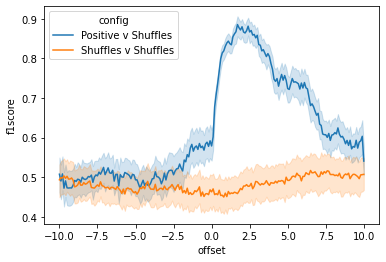

In [5]:
usd2_config = config = BlockConfig(
    data_dir=DATA_DIR, 
    session="day2",
    t_before=10,
    t_after=10,
    coreg_only=True,
    sampling_interval="100ms",
    block="US"
    )
pipe = make_pipeline(SimpleImputer(), StandardScaler(), LogisticRegression())
cv = KFold(10, shuffle=True)
decoder = OffsetDecoder(
    estimator=pipe, 
    cv=cv, 
    scoring="f1_macro", 
    )

handler = TraceHandler(config=usd2_config)
experiment_runner = ExperimentRunner(decoder=decoder, n_shuffles=75)
usd2_results = experiment_runner.run_single(handler)
usd2_results.to_parquet(SAVE_DIR / "USD2.parquet.gzip", compression="gzip")
usd2_results.groupby(["offset", "shuffle", "config"], as_index=False)["f1score"].mean().pipe((sns.lineplot, "data"), x="offset", y="f1score", hue="config")

<AxesSubplot:xlabel='offset', ylabel='f1score'>

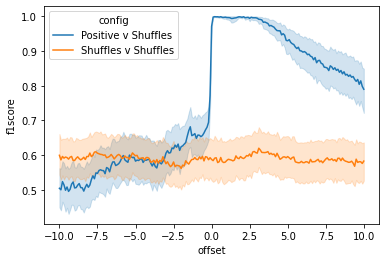

In [7]:
usd4_results.groupby(["offset", "shuffle", "config"], as_index=False)["f1score"].mean().pipe((sns.lineplot, "data"), x="offset", y="f1score", hue="config")

In [2]:
usd4_config = config = BlockConfig(
    data_dir=DATA_DIR, 
    session="day4",
    t_before=10,
    t_after=10,
    coreg_only=True,
    sampling_interval="100ms",
    block="US"
    )
pipe = make_pipeline(SimpleImputer(), StandardScaler(), LogisticRegression())
cv = KFold(10, shuffle=True)
decoder = OffsetDecoder(estimator=pipe, cv=cv, scoring="f1_macro")

handler = TraceHandler(config=usd4_config)
experiment_runner = ExperimentRunner(decoder=decoder, n_shuffles=75)
usd4_results = experiment_runner.run_single(handler)
usd4_results.to_parquet(SAVE_DIR / "USD4.parquet.gzip", compression="gzip")
usd4_results.groupby(["offset", "shuffle", "config"], as_index=False)["f1score"].mean().pipe((sns.lineplot, "data"), x="offset", y="f1score", hue="config")

Positive Versus Shuffle:   0%|          | 0/75 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [3]:
np.concatenate([np.repeat(1, 10)]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Positive Included:   0%|          | 0/75 [00:00<?, ?it/s]

Negative Only:   0%|          | 0/75 [00:00<?, ?it/s]

<AxesSubplot:xlabel='offset', ylabel='f1score'>

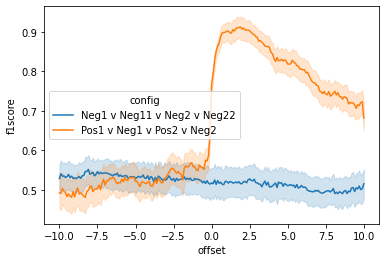

In [2]:
usd2_config = config = BlockConfig(
    data_dir=DATA_DIR, 
    session="day2",
    t_before=10,
    t_after=10,
    coreg_only=True,
    sampling_interval="100ms",
    normalize=True,
    block="US"
    )
usd4_config = config = BlockConfig(
    data_dir=DATA_DIR, 
    session="day4",
    t_before=10,
    t_after=10,
    coreg_only=True,
    sampling_interval="100ms",
    normalize=True,
    block="US"
    )
pipe = make_pipeline(SimpleImputer(), StandardScaler(), LogisticRegression())
cv = KFold(10, shuffle=True)
decoder = OffsetDecoder(estimator=pipe, cv=cv, scoring="f1_macro")

handler_d2 = TraceHandler(config=usd2_config)
handler_d4 = TraceHandler(config=usd4_config)

experiment_runner = ExperimentRunner(decoder=decoder, n_shuffles=75)
us_combined_results = experiment_runner.run_milti(handler_d2, handler_d4)
us_combined_results.to_parquet(SAVE_DIR / "USCombined.parquet.gzip", compression="gzip")
us_combined_results.groupby(["offset", "shuffle", "config"], as_index=False)["f1score"].mean().pipe((sns.lineplot, "data"), x="offset", y="f1score", hue="config")

Positive Versus Shuffle:   0%|          | 0/75 [00:00<?, ?it/s]

Shuffle Versus Shuffle:   0%|          | 0/75 [00:00<?, ?it/s]

<AxesSubplot:xlabel='offset', ylabel='f1score'>

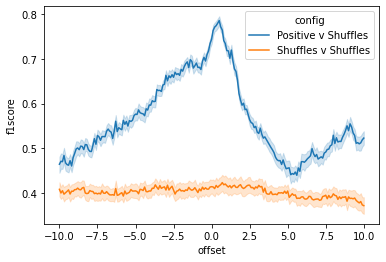

In [26]:
start_config = config = FreezeConfig(
    data_dir=DATA_DIR, 
    session="day2",
    start_stop="start",
    t_before=10,
    t_after=10,
    coreg_only=False,
    sampling_interval="100ms",
    )
pipe = make_pipeline(SimpleImputer(), StandardScaler(), LogisticRegression())
cv = KFold(10, shuffle=True)
decoder = OffsetDecoder(estimator=pipe, cv=cv, scoring="f1_macro")
handler = TraceHandler(config=start_config)
experiment_runner = ExperimentRunner(decoder=decoder, n_shuffles=75)
start_results = experiment_runner.run_single(handler)
start_results.to_parquet(SAVE_DIR / "StartD2.parquet.gzip", compression="gzip")
start_results.groupby(["offset", "shuffle", "config"], as_index=False)["f1score"].mean().pipe((sns.lineplot, "data"), x="offset", y="f1score", hue="config")

Positive Versus Shuffle:   0%|          | 0/75 [00:00<?, ?it/s]

Shuffle Versus Shuffle:   0%|          | 0/75 [00:00<?, ?it/s]

<AxesSubplot:xlabel='offset', ylabel='f1score'>

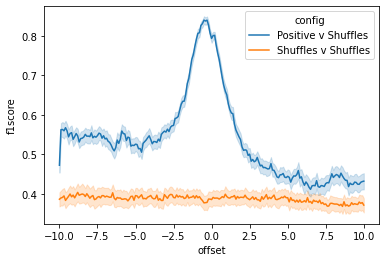

In [27]:
stop_config = config = FreezeConfig(
    data_dir=DATA_DIR, 
    session="day2",
    start_stop="stop",
    t_before=10,
    t_after=10,
    coreg_only=False,
    sampling_interval="100ms",
    )
pipe = make_pipeline(SimpleImputer(), StandardScaler(), LogisticRegression())
cv = KFold(10, shuffle=True)
decoder = OffsetDecoder(estimator=pipe, cv=cv, scoring="f1_macro")
handler = TraceHandler(config=stop_config)
experiment_runner = ExperimentRunner(decoder=decoder, n_shuffles=75)
stop_config = experiment_runner.run_single(handler)
stop_config.to_parquet(SAVE_DIR / "StopD2.parquet.gzip", compression="gzip")
stop_config.groupby(["offset", "shuffle", "config"], as_index=False)["f1score"].mean().pipe((sns.lineplot, "data"), x="offset", y="f1score", hue="config")

Shuffle Versus Shuffle:   0%|          | 0/75 [00:00<?, ?it/s]

<AxesSubplot:xlabel='offset', ylabel='f1score'>

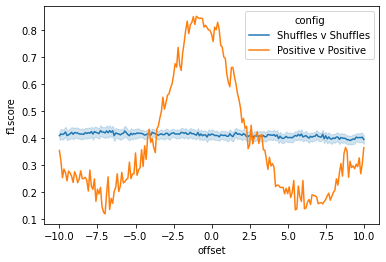

In [36]:
start_config = config = FreezeConfig(
    data_dir=DATA_DIR, 
    session="day2",
    start_stop="start",
    t_before=10,
    t_after=10,
    coreg_only=False,
    sampling_interval="100ms",
    )
stop_config = config = FreezeConfig(
    data_dir=DATA_DIR, 
    session="day2",
    start_stop="stop",
    t_before=10,
    t_after=10,
    coreg_only=False,
    sampling_interval="100ms",
    )
pipe = make_pipeline(SimpleImputer(), StandardScaler(), LogisticRegression())
cv = KFold(10, shuffle=True)
decoder = OffsetDecoder(estimator=pipe, cv=cv, scoring="f1_macro")
handler_d2 = TraceHandler(config=start_config)
handler_d4 = TraceHandler(config=stop_config)

experiment_runner = ExperimentRunner(decoder=decoder, n_shuffles=75)
startstop_combined_results = experiment_runner.run_combined(handler_d2, handler_d4)
startstop_combined_results.to_parquet(SAVE_DIR / "StartStopD2Combined.parquet.gzip", compression="gzip")
startstop_combined_results.groupby(["offset", "shuffle", "config"], as_index=False)["f1score"].mean().pipe((sns.lineplot, "data"), x="offset", y="f1score", hue="config")

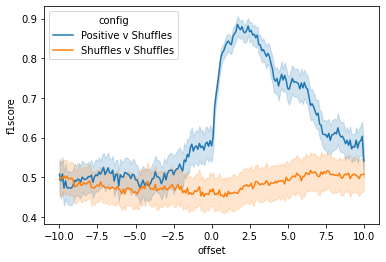

In [15]:
df = pd.read_parquet(SAVE_DIR / "USD2.parquet.gzip").groupby(["offset", "config", "shuffle"], as_index=False)["f1score"].mean()
ax = sns.lineplot(data=df, x="offset", y="f1score", hue="config")
plt.savefig(SAVE_DIR / "USD2-offset-decode.svg")
df.to_csv(SAVE_DIR / "USD2-offset-decode.csv", index=False)

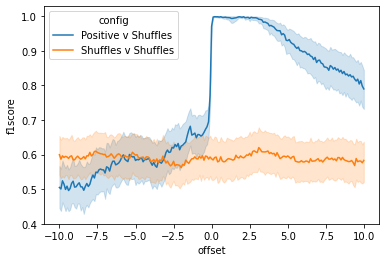

In [17]:
df = pd.read_parquet(SAVE_DIR / "USD4.parquet.gzip").groupby(["offset", "config", "shuffle"], as_index=False)["f1score"].mean()
ax = sns.lineplot(data=df, x="offset", y="f1score", hue="config")
plt.savefig(SAVE_DIR / "USD4-offset-decode.svg")
df.to_csv(SAVE_DIR / "USD4-offset-decode.csv", index=False)

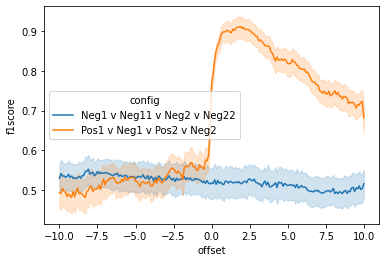

In [18]:

df = pd.read_parquet(SAVE_DIR / "USCombined.parquet.gzip").groupby(["offset", "config", "shuffle"], as_index=False)["f1score"].mean()
ax = sns.lineplot(data=df, x="offset", y="f1score", hue="config")
plt.savefig(SAVE_DIR / "USCombined-offset-decode.svg")
df.to_csv(SAVE_DIR / "USCombined-offset-decode.csv", index=False)

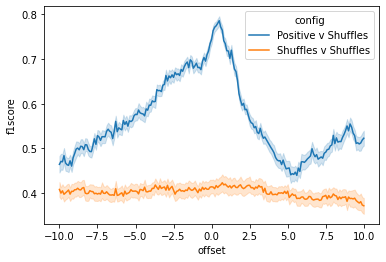

In [19]:
df = pd.read_parquet(SAVE_DIR / "StartD2.parquet.gzip").groupby(["offset", "config", "shuffle"], as_index=False)["f1score"].mean()
ax = sns.lineplot(data=df, x="offset", y="f1score", hue="config")
plt.savefig(SAVE_DIR / "StartD2-offset-decode.svg")
df.to_csv(SAVE_DIR / "StartD2-offset-decode.csv", index=False)

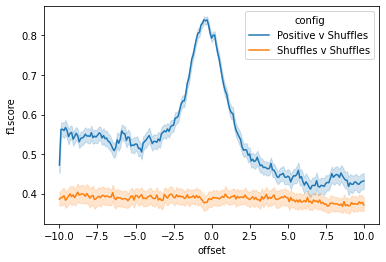

In [20]:
df = pd.read_parquet(SAVE_DIR / "StopD2.parquet.gzip").groupby(["offset", "config", "shuffle"], as_index=False)["f1score"].mean()
ax = sns.lineplot(data=df, x="offset", y="f1score", hue="config")
plt.savefig(SAVE_DIR / "StopD2-offset-decode.svg")
df.to_csv(SAVE_DIR / "StopD2-offset-decode.csv", index=False)

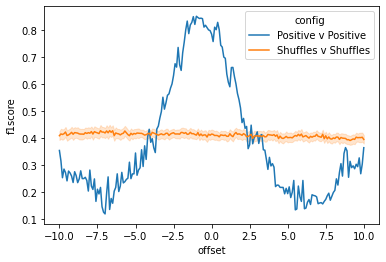

In [21]:
df = pd.read_parquet(SAVE_DIR / "StartStopD2Combined.parquet.gzip").groupby(["offset", "config", "shuffle"], as_index=False)["f1score"].mean()
ax = sns.lineplot(data=df, x="offset", y="f1score", hue="config")
plt.savefig(SAVE_DIR / "StartStopD2Combined-offset-decode.svg")
df.to_csv(SAVE_DIR / "StartStopD2Combined-offset-decode.csv", index=False)

In [23]:
pd.read_parquet(SAVE_DIR / "StartStopD2Combined.parquet.gzip").to_csv(SAVE_DIR / "StartStopD2Combined-offset-decode-WITH-CV-SCORES.csv", index=False)